<a href="https://colab.research.google.com/github/meryemaali/projetBDC/blob/main/projet_BDC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tweepy
from tweepy import API
from tweepy import Cursor
from tweepy import Stream
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler


import numpy as np
import pandas as pd



In [ ]:
consumerKey = '729qJ4Aj9SawJ3tcd7XQnPsgD' 
consumerSecret = 'xYweEiRy9I6TPo9z1lVAgYgtvhvekDv0yuy0fabsmbmbajFPju'
accessToken = '1481675203998633988-9KvnDb27YcBNcwWJqhfeL720MPCOSw'
acessTokenSecret = 'cUzKpFsnJbF3jEQ67IQKlsg519T5c2r0WnAQ2RCDCJxka'

In [ ]:
auth = tweepy.OAuthHandler(consumerKey , consumerSecret)
auth.set_access_token(accessToken,acessTokenSecret)
api = tweepy.API(auth)

In [ ]:
for tweet in api.search('Trump'):
  print(tweet.text)


RT @BillKristol: Why the 7 forged certifications matter:
Eastman memo: "Pence...announces because of the ongoing disputes...there are no el…
RT @watanabe_engeki: 【情報公開】
TRUMPシリーズ15th ANNIVERSARY始動。
『LILIUM -リリウム 少女純潔歌劇-』
2023年4月再演＆フルキャストオーディション開催決定！

https://t.co/osQeZzIk9k

#LIL…
RT @YahooNews: Rep. Jamie Raskin, D-Md., says the upcoming hearings by the Jan. 6 select committee probing the riot at the U.S. Capitol sta…
Carter hates spiders and rabbits and is indifferent about Trump
RT @DawsonSField: @hellasfynist @yepsuzn @CiceroConsulta1 Not mention the guys screwing over a Native American tribe with a bond issue, the…
RT @LincolnWatchman: “If Donald Trump is on the ballot in ‘24, he’s not the issue in the election. The issue is us. The American people. Wh…
Méthode Trump! Balance une horreur et hop revient en première place dans les médias ! https://t.co/g2VM4yoMLb
RT @maddow: "The decision [to refer the matter to federal prosecutors] does not preclude possible state charges against t

In [ ]:
df= pd.DataFrame(columns= ['Tweets', 'Tweet_id', 'User', 'User_id', 'User_statuses_count','User_followers','User_friends_count','User_location','fav_count',
                           'rt_count','tweet_data', 'User_verified'])

In [ ]:
def stream(data , file_name):
  i = 0
  for tweet in tweepy.Cursor(api.search , q=data , count=100, lang='en').items():
    df.loc[i , 'Tweets']=tweet.text
    df.loc[i, 'Tweets.id']=tweet.id
    df.loc[i, 'User']=tweet.user.name
    df.loc[i, 'User_id']=tweet.user.id
    df.loc[i, 'User_statuses_count']=tweet.user.statuses_count
    df.loc[i, 'User_followers']=tweet.user.followers_count
    df.loc[i, 'User_friends_count']=tweet.user.friends_count
    df.loc[i, 'User_location']=tweet.user.location
    df.loc[i, 'fav_count']=tweet.favorite_count
    df.loc[i, 'rt_count']=tweet.retweet_count
    df.loc[i, 'tweet_data']=tweet.created_at
    df.loc[i, 'User_verified']=tweet.user.verified
    df.to_csv('{}.csv'.format(file_name))
    i=i+1
    if i == 1000:
      break
    else :
      pass

In [ ]:
stream(data =['Trump'], file_name = 'my_tweets_2K')
df.head()

,Tweets,Tweet_id,User,User_id,User_statuses_count,User_followers,User_friends_count,User_location,fav_count,rt_count,tweet_data,User_verified,Tweets.id,clean_tweet,Sentiment
0,RT @DeathMetalV: People crying about Dr. Fauci...,NaN,lisa coleman bradlow,150706185,82389,492,1318,,0,1583,2022-01-15 12:49:29,False,1.482334e+18,": When Republicans take back the House, _Jorda...",2
1,RT @duty2warn: Flynn is at it again. Remember ...,NaN,mother of dragons ! vaxxed and boosted,20718289,33676,904,872,,0,2935,2022-01-15 12:49:29,False,1.482334e+18,: This is an Oathkeepers attorney. He suggests...,2
2,Trump set off revolt at Census Bureau with att...,NaN,SWCC Vet CJ,1260193810375639040,56532,3020,3027,United States,0,0,2022-01-15 12:49:29,False,1.482334e+18,: BREAKING: Democratic Congressman Ruben Galle...,0
3,RT @ChristopherHahn: Americans elect Republica...,NaN,Enid Logan,247012981,404291,603,1147,"Bethlehem, Pa.",0,471,2022-01-15 12:49:28,False,1.482334e+18,"Good morning Tweeps, well I am embarrassed to ...",4
4,RT @ElectionWiz: SCORECARD--GOP who voted to i...,NaN,Aloysuis Aardvark,1378409855577391109,32535,1971,251,,0,3317,2022-01-15 12:49:28,False,1.482334e+18,Has anyone other than Trump and Joe Rogan been...,4


In [ ]:
from textblob import TextBlob
from wordcloud import WordCloud , STOPWORDS

In [ ]:
import re
def clean_tweet(tweet):
  tweet = re.sub(r'@[A-Za-z0-9]+' , '' , tweet) #Removed @mentions
  tweet = re.sub(r'#', '' , tweet) #Removing the '#' symbol
  tweet = re.sub(r'RT[\s]+','',tweet)  #Removing RT
  tweet = re.sub(r'https?:\/\/\S+' , '' , tweet) #remove the hyper Link

  return tweet

In [ ]:
def analyze_sentiment(tweet):
  analysis = TextBlob(tweet)
  if analysis.sentiment.polarity > 0 :
    return '4'
  elif analysis.sentiment.polarity == 0:
    return '2'
  else : 
    return '0'
    

In [ ]:
df['clean_tweet'] = df['Tweets'].apply(lambda x: clean_tweet(x))
df['Sentiment'] = df['clean_tweet'].apply(lambda x : analyze_sentiment(x))

In [ ]:
n=12
print('Clean Original Tweet:\n' + df['Tweets'][n])
print('Clean Tweet :\n' + df['clean_tweet'][n])
print('Sentiment:\n' + df['Sentiment'][n])

Clean Original Tweet:
RT @RSBNetwork: BREAKING: President Donald J. Trump announces rally in Conroe, Texas on Jan. 29 🚨🚨🚨 https://t.co/ujo1Ztcbep

Clean Tweet :
: BREAKING: President Donald J. Trump announces rally in Conroe, Texas on Jan. 29 🚨🚨🚨 

Sentiment:
2


In [ ]:
print(df['Sentiment'].unique())
df['Sentiment'] = df['Sentiment'].astype(int)
print(df['Sentiment'].unique())
print(df['Sentiment'].value_counts())

['0' '2' '4']
[0 2 4]
2    521
4    296
0    183
Name: Sentiment, dtype: int64


In [ ]:
all_tweets = ' '.join(tweet for tweet in df['clean_tweet'])

In [ ]:
wordcloud = WordCloud(stopwords=STOPWORDS).generate(all_tweets)

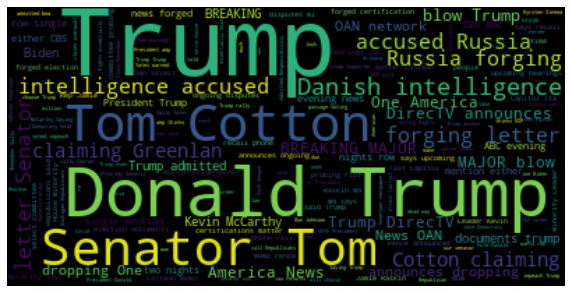

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize =(10,10))
plt.imshow(wordcloud , interpolation='bilinear')
plt.axis("off")
plt.show()

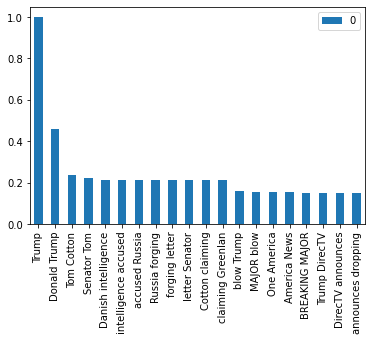

In [ ]:
df_freq = pd.DataFrame.from_dict(data = wordcloud.words_, orient='index')
df_freq = df_freq.head(20)
df_freq.plot.bar()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Tweets               1000 non-null   object 
 1   Tweet_id             0 non-null      object 
 2   User                 1000 non-null   object 
 3   User_id              1000 non-null   object 
 4   User_statuses_count  1000 non-null   object 
 5   User_followers       1000 non-null   object 
 6   User_friends_count   1000 non-null   object 
 7   User_location        1000 non-null   object 
 8   fav_count            1000 non-null   object 
 9   rt_count             1000 non-null   object 
 10  tweet_data           1000 non-null   object 
 11  User_verified        1000 non-null   object 
 12  Tweets.id            1000 non-null   float64
 13  clean_tweet          1000 non-null   object 
 14  Sentiment            1000 non-null   int64  
dtypes: float64(1), int64(1), object(13)
mem

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
!tar xf spark-3.0.0-bin-hadoop3.2.tgz
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-1.8.0-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

In [ ]:
import findspark
findspark.init()

In [ ]:
from pyspark.sql import SparkSession

In [ ]:
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.ml.classification  import LogisticRegression
from pyspark.ml.feature import HashingTF, Tokenizer , StopWordsRemover


In [ ]:
#create Spark Session
appName = "Sentiment Analysis in Spark"
spark = SparkSession.builder.appName(appName).config("spark.some.config.option" , "some-value").getOrCreate()


In [ ]:
tweets_csv = spark.createDataFrame(df)
tweets_csv.printSchema()
tweets_csv.show(truncate=False , n=10)


root
 |-- Tweets: string (nullable = true)
 |-- Tweet_id: double (nullable = true)
 |-- User: string (nullable = true)
 |-- User_id: long (nullable = true)
 |-- User_statuses_count: long (nullable = true)
 |-- User_followers: long (nullable = true)
 |-- User_friends_count: long (nullable = true)
 |-- User_location: string (nullable = true)
 |-- fav_count: long (nullable = true)
 |-- rt_count: long (nullable = true)
 |-- tweet_data: timestamp (nullable = true)
 |-- User_verified: boolean (nullable = true)
 |-- Tweets.id: double (nullable = true)
 |-- clean_tweet: string (nullable = true)
 |-- Sentiment: long (nullable = true)

+--------------------------------------------------------------------------------------------------------------------------------------------+--------+--------------------------------------+-------------------+-------------------+--------------+------------------+----------------+---------+--------+-------------------+-------------+----------------------+---------

In [ ]:
#selecting clean_tweets and Sentiment Variables
data = tweets_csv.select("clean_tweet" , col("Sentiment").cast("Int").alias("label"))
data.show(truncate = False , n=10)

+-------------------------------------------------------------------------------------------------------------------------------+-----+
|clean_tweet                                                                                                                    |label|
+-------------------------------------------------------------------------------------------------------------------------------+-----+
|: People crying about Dr. Fauci finacials records never GAF about Donald Trump disclosing his tax returns.                     |0    |
|: Flynn is at it again. Remember when Sally Yates warned that Flynn was being blackmailed? When Obama warned Trump about Flynn…|2    |
|Trump set off revolt at Census Bureau with attempt to manipulate the numbers for political advantage                           |2    |
|: Americans elect Republican Presidents who’s policies always end in disaster.  

Then they choose a Democrat to clean u…      |4    |
|: SCORECARD--GOP who voted to impeach Trump:

K

In [ ]:
#divide data , 70% for training , 30% for testing
dividedData = data.randomSplit([0.7 , 0.3])
trainingData = dividedData[0]
testingData = dividedData[1]
train_rows = trainingData.count()
test_rows = testingData.count()
print("Training Data rows : " , train_rows , "; Testing Data rows : ", test_rows)


Training Data rows :  699 ; Testing Data rows :  301


In [ ]:
tokenizer = Tokenizer(inputCol="clean_tweet" , outputCol="SentimentWords")
tokenizedTrain = tokenizer.transform(trainingData)
tokenizedTrain.show(truncate=False , n=10)

+---------------------------------------------------------------------------------------------------+-----+------------------------------------------------------------------------------------------------------------------------+
|clean_tweet                                                                                        |label|SentimentWords                                                                                                          |
+---------------------------------------------------------------------------------------------------+-----+------------------------------------------------------------------------------------------------------------------------+
|   And one of them was who Trump listened to                                                       |2    |[, , , and, one, of, them, was, who, trump, listened, to]                                                               |
|  Donald Trump believes he’s above the law because of everything he’s done and has 

In [ ]:
swr = StopWordsRemover(inputCol=tokenizer.getOutputCol(), outputCol="MeaningfulWords")
swRemovedTrain = swr.transform(tokenizedTrain)
swRemovedTrain.show(truncate=False , n =10)

+---------------------------------------------------------------------------------------------------+-----+------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------+
|clean_tweet                                                                                        |label|SentimentWords                                                                                                          |MeaningfulWords                                                                  |
+---------------------------------------------------------------------------------------------------+-----+------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------+
|   And one of them was who Trump listened to                      

In [ ]:
hashTF = HashingTF(inputCol=swr.getOutputCol(), outputCol="features" )
numericTrainData = hashTF.transform(swRemovedTrain).select('label' , 'MeaningfulWords' , 'features')
numericTrainData.show(truncate = False , n=10)

+-----+---------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------+
|label|MeaningfulWords                                                                  |features                                                                                                                         |
+-----+---------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------+
|2    |[, , , one, trump, listened]                                                     |(262144,[21823,120768,231008,249180],[1.0,1.0,1.0,3.0])                                                                          |
|2    |[, , donald, trump, believes, he’s, law, everything, he’s, done, never, paid, t…]|(262144,[64382,69099,80649,8759

In [ ]:
lr = LogisticRegression(labelCol="label" , featuresCol="features" , maxIter =10 , regParam=0.01)
model = lr.fit(numericTrainData)
print("training is done")

training is done


In [ ]:
tokenizedTest = tokenizer.transform(testingData)
SwRemovedTest = swr.transform(tokenizedTest)
numericTest = hashTF.transform(SwRemovedTest).select('label' , 'MeaningfulWords' , 'features')
numericTest.show(truncate=False , n =10)

+-----+-------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|label|MeaningfulWords                                                                                        |features                                                                                                                                                                          |
+-----+-------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|0    |[, , , mean, like, trump, weaponized, got, doj?, , , and,, glorifies, authoritarian, lea…]             |(262144,[2977,26

In [ ]:
prediction = model.transform(numericTest)

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(predictionCol = "prediction")
evaluator.evaluate(prediction)

0.7696591866087409

In [ ]:
predictionFinal = prediction.select("MeaningfulWords" , "prediction" , "label")
predictionFinal.show(n =5  , truncate= False )
correctPrediction = predictionFinal.filter(
    predictionFinal['prediction'] == predictionFinal['label']).count()
totalData = predictionFinal.count()
print("correct prediction :" , correctPrediction , "Total Data : " , totalData,
      ", accuracy : " ,  correctPrediction/totalData)

NameError: ignored

In [ ]:
pip install --user --upgrade pixiedust


In [ ]:
import pixiedust
from pixiedust.display import *

In [ ]:
display(predictionFinal)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from pyspark.ml.classification import NaiveBayes
nb = NaiveBayes(smoothing = 1)
model2 = nb.fit(numericTrainData)
print("Model is trained !")


Model is trained !


In [ ]:
prediction = model2.transform(numericTest)
predictionFinal2 = prediction.select("MeaningfulWords" , "prediction" , "label")
predictionFinal2.show(n =20 , truncate = False)
correctPrediction = predictionFinal2.filter(
    predictionFinal2['prediction'] == predictionFinal2['label']).count()
totalData = predictionFinal2.count()
print("correct prediction :" , correctPrediction , "Total Data : " , totalData,
      ", accuracy : " ,  correctPrediction/totalData)

+------------------------------------------------------------------------------------------------------------------+----------+-----+
|MeaningfulWords                                                                                                   |prediction|label|
+------------------------------------------------------------------------------------------------------------------+----------+-----+
|[, , , mean, like, trump, weaponized, got, doj?, , , and,, glorifies, authoritarian, lea…]                        |1.0       |0    |
|[, , good, comparisons., warner, trump,, johnson,, hitler]                                                        |2.0       |4    |
|[, , get, turned, maga, folks, time., , apparently, like, views, donal…]                                          |1.0       |4    |
|[, , think, great, country, let, trump, cheat, p…]                                                                |1.0       |4    |
|[, , started, way, trump., lit, fire, egged, on.]            

In [ ]:
display(predictionFinal2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from pyspark.ml.classification import RandomForestClassifier

rfc = RandomForestClassifier(numTrees = 3 , seed = 42 , labelCol="label" , featuresCol="features")
model3 = rfc.fit(numericTrainData)
print("Model is Trained")

Model is Trained


In [ ]:
prediction = model3.transform(numericTest)
predictionFinal3 = prediction.select("MeaningfulWords" , "prediction" ,"label" )
predictionFinal3.show(n=20 , truncate = False )
correctPrediction = predictionFinal3.filter(
    predictionFinal3['prediction'] == predictionFinal3['label']).count()
totalData = predictionFinal3.count()
print("correct prediction :" , correctPrediction , "Total Data : " , totalData,
      ", accuracy : " ,  correctPrediction/totalData)

+------------------------------------------------------------------------------------------------------------------+----------+-----+
|MeaningfulWords                                                                                                   |prediction|label|
+------------------------------------------------------------------------------------------------------------------+----------+-----+
|[, , , mean, like, trump, weaponized, got, doj?, , , and,, glorifies, authoritarian, lea…]                        |2.0       |0    |
|[, , good, comparisons., warner, trump,, johnson,, hitler]                                                        |2.0       |4    |
|[, , get, turned, maga, folks, time., , apparently, like, views, donal…]                                          |2.0       |4    |
|[, , think, great, country, let, trump, cheat, p…]                                                                |2.0       |4    |
|[, , started, way, trump., lit, fire, egged, on.]            

In [ ]:
from pyspark.ml.clustering import LDA

In [ ]:
from pyspark.ml.clustering import LDA
lda = LDA(k=7 , maxIter=10, featuresCol="features")
model = lda.fit(numericTest)
ll = model.logLikelihood(numericTest)
lp = model.logPerplexity(numericTest)
print("The lower bound on the log likelihood of the entire corpus : "+ str(ll))
print("The upper bound on perplexity : " + str(lp))




The lower bound on the log likelihood of the entire corpus : -1271039.3504860904
The upper bound on perplexity : 322.6807185798655


In [ ]:
topics = model.describeTopics(7)
print("The topics described by their top-weighted terms : ")
topics.show(truncate = False )
#Show the result           
transformed = model.transform(numericTest)
print(transformed.show())
print(transformed.show(truncate =False))

The topics described by their top-weighted terms : 
+-----+-------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------+
|topic|termIndices                                            |termWeights                                                                                                                                                     |
+-----+-------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------+
|0    |[231152, 198132, 41855, 159910, 47685, 41129, 69060]   |[7.692736658375329E-5, 4.226660290790569E-5, 3.323784188960091E-5, 3.315194637877056E-5, 3.3071837977367396E-5, 3.3023945669470885E-5, 3.266475443918843E-5]    |
|1    |[156692, 10004, 60957, 57722, 79462, 1177

In [ ]:
topn_words = 70
num_topics = 7

topics= model.topicsMatrix().toArray()
for topic in range(num_topics):
  print("Topic " + str(topic) + ":")
  for word in range(0, topn_words) : 
    print(" "+ str(topics[word][topic]))

Topic 0:
 0.8997064624011603
 0.8318578977917217
 0.7583129207273296
 0.9009100328237304
 0.8137093750203936
 0.9213714235016408
 0.823566540152679
 0.7866767418924889
 0.7938540065808494
 0.8375958391665896
 0.7861413050831573
 0.603574873541319
 0.6935125750606894
 0.9437832112309237
 0.7123611546505556
 0.8313864441357149
 0.7884330879197595
 0.7545670515228364
 0.8133217796127208
 0.8101658349662841
 0.8388045507823196
 0.8108217866290252
 0.788967964052824
 0.7182211617848289
 0.7002421299875773
 0.7668068286747162
 0.7264172091289438
 0.7150821980469604
 0.8632776551839567
 0.7379318072116051
 0.7301576025173662
 0.7787979338826461
 0.754201173420011
 0.7874562683206155
 0.8260397622968453
 0.6830735898516467
 0.7836635390560316
 0.7925784277985973
 0.7792756081151478
 0.7968430219763201
 0.8734931421496905
 0.7562334596512605
 0.7974084452371477
 0.7505925275406901
 0.8866904749616976
 0.7508409228010511
 0.8754888205261353
 0.9237117138269756
 0.7896851864861036
 0.692420907017

In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols = ['User_statuses_count' , 'User_followers' , 'User_friends_count'],
                            outputCol="features")



In [ ]:
data  = assembler.transform(tweets_csv).select('User' , 'features')
data.show(truncate = False , n=3)
data.count()

+--------------------------------------+-----------------------+
|User                                  |features               |
+--------------------------------------+-----------------------+
|lisa coleman bradlow                  |[82389.0,492.0,1318.0] |
|mother of dragons ! vaxxed and boosted|[33676.0,904.0,872.0]  |
|SWCC Vet CJ                           |[56532.0,3020.0,3027.0]|
+--------------------------------------+-----------------------+
only showing top 3 rows



1000

In [ ]:
cost = np.zeros(20)
for k in range(2,20):
  kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("features")
  model = kmeans.fit(data.sample(False , 0.1 , seed=42))


In [ ]:
#define Kmeans clustering algorithm
kmeans = KMeans(
    featuresCol = assembler.getOutputCol(),
    predictionCol = "cluster" , k=6)
model = kmeans.fit(data)
print("Model is successfully trained !")

Model is successfully trained !


In [ ]:
centers = model.clusterCenters()
print("Cluster Centers :")
for center in centers : 
  print(center)

Cluster Centers :
[136957.92018779   5850.44600939   4917.90140845]
[3123447.   89555.   71590.]
[392008.61818182  16397.43636364   9497.87272727]
[22362.31328671  1282.5034965   1562.81958042]
[871938.15384615  12438.          10200.15384615]
[165583.         344899.33333333  85600.66666667]


In [ ]:
transformed = model.transform(data).select('User' , 'cluster')
rows = transformed.collect()
print(rows[:3])

[Row(User='lisa coleman bradlow', cluster=0), Row(User='mother of dragons ! vaxxed and boosted', cluster=3), Row(User='SWCC Vet CJ', cluster=3)]


In [ ]:
df_pred = spark.createDataFrame(rows)
df_pred.show()

+--------------------+-------+
|                User|cluster|
+--------------------+-------+
|lisa coleman bradlow|      0|
|mother of dragons...|      3|
|         SWCC Vet CJ|      3|
|          Enid Logan|      2|
|   Aloysuis Aardvark|      3|
|       Sandy Krebeck|      3|
|  Think...it is free|      3|
|               maryb|      3|
|                 JG3|      3|
|       Kushal Shetty|      3|
|        Larry Cotten|      3|
| Deb Houchen McMahon|      0|
|       Frances Taney|      3|
|      Verisimilitude|      3|
|      Florida Issues|      0|
|    Ced'Juan Johnson|      3|
|         Tomthunkit™|      1|
|                meta|      4|
|            Agelaius|      3|
|                 Jen|      3|
+--------------------+-------+
only showing top 20 rows



In [ ]:
df = tweets_csv[['User', 'User_statuses_count' , 'User_followers' , 'User_friends_count']]
df_pred = df_pred.join(df , 'User')
df_pred.show()

+--------------------+-------+-------------------+--------------+------------------+
|                User|cluster|User_statuses_count|User_followers|User_friends_count|
+--------------------+-------+-------------------+--------------+------------------+
|                   K|      3|               5366|           102|               906|
|            VA voter|      3|               1774|            26|               126|
|           Valerie L|      3|                 17|             3|                70|
|  solomon a copeland|      3|              48447|           946|              4999|
|     Ann Milernowski|      3|              37233|          3693|              3646|
|GoodAdvicePublishing|      3|              53355|         24240|             18813|
|GoodAdvicePublishing|      3|              53355|         24241|             18813|
|GoodAdvicePublishing|      3|              53355|         24240|             18813|
|GoodAdvicePublishing|      3|              53355|         24241|

In [ ]:
pddf_pred = df_pred.toPandas().set_index('User')
pddf_pred.head()

,cluster,User_statuses_count,User_followers,User_friends_count
User,,,,
K,3,5366,102,906
VA voter,3,1774,26,126
Valerie L,3,17,3,70
solomon a copeland,3,48447,946,4999
Ann Milernowski,3,37233,3693,3646


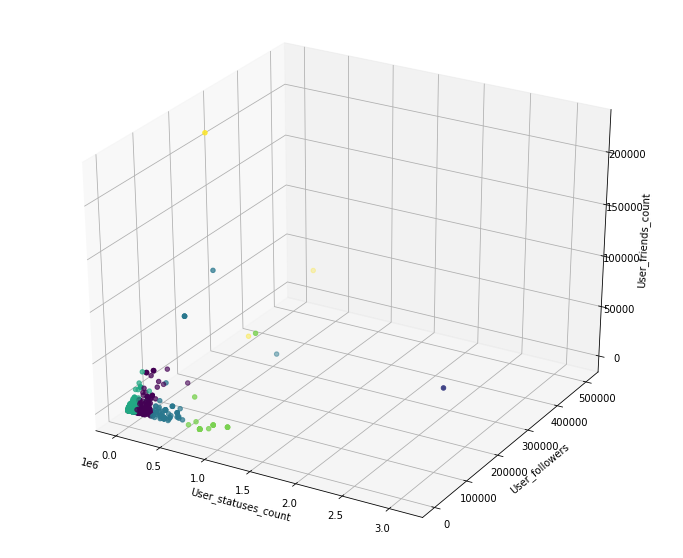

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

threedee = plt.figure(figsize=(12,10)).gca(projection = '3d')
threedee.scatter(pddf_pred.User_statuses_count , pddf_pred.User_followers , pddf_pred.User_friends_count , c=pddf_pred.cluster)
threedee.set_xlabel('User_statuses_count')
threedee.set_ylabel('User_followers')
threedee.set_zlabel('User_friends_count')
plt.show()